In this lab, we are trying to make a computer simulation of propagation (of light for instance) in a variable-index environment. This means that propagation speed depends on where we are in space. The aim is to compute the fastest path between a start point (sx, sy) and an end point. To do so, we compute for each point (x,y) the needed time φ(x, y) to go from (sx, sy) to (x,y).

We can show that φ follows an eikonal equation. To solve this equation, we rewrite it in the form of an unsteady equation, and to look for the steady solutions by looking at the behaviour when time grows towards infinity.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Schema de Lax-Friedrichs

In this part, we will create a mesh of the domain Ω^2 = [0, 1], in which our wave will propagate with a step of length h, constant in x and y. The Lax-Friedrichs scheme works as below

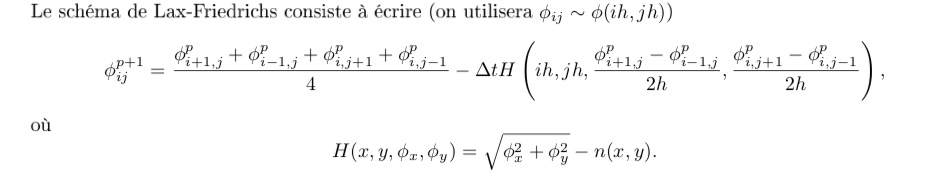

In [25]:
def indice_dioptre(x,y):
# In this situation, we consider an index with two values in space

#Input:
#     x: float, the position along the x-axis
#     y: float, the position along the y-axis


#Output:
#     float, the value of the index at the point with coordinates (x,y)


##################


    if y <= 0.5:
        return 1
    else:
        return 10

    
def H_fixe(x, y, phiX, phiY):
# We define the H function used in the Lax-Friedrichs algorithm which depends on our index


    n = indice_dioptre(x,y)
    return np.sqrt(phiX**2 + phiY**2) - n

In [50]:
def phi(phiPrecedent):
# In the LF scheme described above, this computes all the values of φ in the mesh at time 
# p+1

# Input:
#     phiPrecedent: values of φ in the mesh at time p

# Output:
#     res: values of φ in the mesh at time p+1


##################### 


    sx = 0.5
    sy = 0.1
    h = 1/40
    delta = h/2
    i0 = sx / h 
    j0 = sy /h
    N= 40
    
    res = phiPrecedent
    
    for i in range (N):
        for j in range (N):
            if (i ==i0 and j== j0):
                res[i,j] = 0
            elif i == 1:
                res[i,j] = res[2,j]
            elif i == N-1:
                res[i,j] = res[N-2,j]
            elif j==N-1:
                res[i,j] = res[i,N-2]
            elif j ==1:
                res[i,j] = res[i,2]
            else:
                res[i,j] = (phiPrecedent[i+1,j] + phiPrecedent[i-1, j] + phiPrecedent[i, j+1] + phiPrecedent[i, j-1])/4 - delta * H_fixe(i*h, j*h, (phiPrecedent[i+1, j] - phiPrecedent[i-1,j])/(2*h),
                            (phiPrecedent[i, j+1] - phiPrecedent[i,j-1])/(2*h)) 
        
    return res


def LF(p):
# This function enables to create iteratively the LF scheme

# Input:
#      p: int, the number of iterations to do

# Output:
#      void
#      we plot the level curves of φ

################## 

    N = 40
    res = np.zeros ((N,N))
    for i in range (0,p+1):
        res = phi(res)
        
    X= np.linspace(0,1, 40)
    Y = np.linspace(0,1, 40)
    plt.figure(figsize=(5,5))
    plt.contour(X,Y, res)

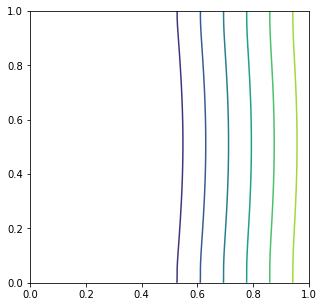

In [27]:
LF(2000)

# Indice Variable

In [31]:
def indice_variable(x,y):
# In this situation, we consider an index with a complex expression

#Input:
#     x: float, the position along the x-axis
#     y: float, the position along the y-axis


#Output:
#     float, the value of the index at the point with coordinates (x,y)   

#################


    sigma = 1.5
    lx = 0.6
    ly = 0.5
    
    return 1 + sigma * (np.exp(-200*((x - lx) ** 2) - 20 * ((y - ly) ** 2)))

def H_variable(x, y, phiX, phiY):

# We define the H function used in the Lax-Friedrichs algorithm which depends on our index


    n = indice_variable(x,y)
    return np.sqrt(phiX**2 + phiY**2) - n

In [52]:
def phi_variable(phiPrecedent):
    
# In the LF scheme described above, this computes all the values of φ in the mesh at time 
# p+1. The difference is that here we use a different H function and different index

# Input:
#     phiPrecedent: values of φ in the mesh at time p

# Output:
#     res: values of φ in the mesh at time p+1


##################### 



    sx = 0.5
    sy = 0.1
    h = 1/40
    delta = h/2
    i0 = sx / h 
    j0 = sy /h
    N= 40
    
    res = phiPrecedent
    
    for i in range (N):
        for j in range (N):
            if (i ==i0 and j== j0):
                res[i,j] = 0
            elif i == 1:
                res[i,j] = res[2,j]
            elif i == N-1:
                res[i,j] = res[N-2,j]
            elif j==N-1:
                res[i,j] = res[i,N-2]
            elif j ==1:
                res[i,j] = res[i,2]
            else:
                res[i,j] = (phiPrecedent[i+1,j] + phiPrecedent[i-1, j] + phiPrecedent[i, j+1] + phiPrecedent[i, j-1])/4 - delta * H_variable(i*h, j*h, (phiPrecedent[i+1, j] - phiPrecedent[i-1,j])/(2*h), (phiPrecedent[i, j+1] - phiPrecedent[i,j-1])/(2*h)) 
        
    return phiPrecedent


def LF_variable(p):
# This function enables to create iteratively the LF scheme with the floating index

# Input:
#      p: int, the number of iterations to do

# Output:
#      res: the values of 
#      we plot the level curves of φ

################## 



    N = 40
    res = np.zeros ((N,N))
    for i in range (0,p+1):
        res = phi_variable(res)
    
    X= np.linspace(0,1, 40)
    Y = np.linspace(0,1, 40)
    plt.figure(figsize=(5,5))
    plt.contour(X,Y, res.T)  
    
    return res  


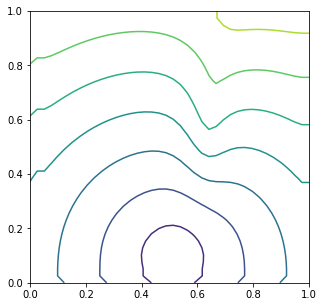

In [40]:
LF_variable(500)

In [49]:
def plot_indice():

# Simple function that plots the level curves of our floating index across the mesh

    indices = np.zeros((40,40))
    for i in range(0,40):
        for j in range (0,40):
            indices[i,j] = indice_variable(i/40, j/40)
    
    X= np.linspace(0,1, 40)
    Y = np.linspace(0,1, 40) 
    plt.figure(figsize=(5,5))
    plt.contour(X,Y, indices.T) 

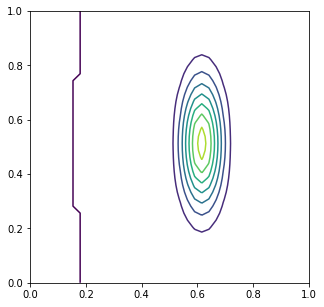

In [48]:
plot_indice()

We can see that level curves are closer where the index has greater values 

# Rayons



In this part we will suppose that the value of φ have converged and that we have its exact value.

https://en.wikipedia.org/wiki/Heun%27s_method

In [162]:
def eulerExplicite(n):
    sx = 0.5
    sy = 0.1
    X0 = [sx, sy]
    X = X0
    h = 1/40
    delta = h/2
    trajectoire = [X0]
    phi = LF_variable(500)
    for i in range (1, n+1):
        X = X - np.dot((delta/(indice_variable(X[0], X[1]) ** 2)),grad_approx(X, phi))
        trajectoire.append(X)
    return trajectoire


def grad_approx(X, phi):
    sx = X[0]
    sy = X[1]
    i,j = get_indices(X)
    
    h = 1/40
    lamda = sx - i*h
    mu = sy - j*h
    
    beta = phi[i + 1,j] - phi[i,j]
    gamma = phi[i,j + 1] - phi[i,j]
    delta = phi[i+1,j+1] + phi[i,j] - phi[i+1,j] - phi[i,j+1]
    
    return [beta + delta * mu, gamma + delta * lamda]


def get_indices(X):
    sx = X[0]
    sy = X[1]
    
    i = int(np.floor(sx * 40))
    j = int(np.floor(sy * 40))
    return i,j

    

In [163]:
eulerExplicite(10)
# get_indices([0.371001, 0.4])

[[0.5, 0.1],
 array([0.49945023, 0.09945136]),
 array([0.49968945, 0.09969096]),
 array([0.49992869, 0.09993058]),
 array([0.50016795, 0.10017022]),
 array([0.49961832, 0.09962172]),
 array([0.49985755, 0.09986133]),
 array([0.50009681, 0.10010097]),
 array([0.49954712, 0.09955241]),
 array([0.49978635, 0.09979201]),
 array([0.5000256 , 0.10003164])]